In [11]:
import networkx as nx
import pylab as plt
import csv
import numpy as np
import pandas as pd

In [12]:
# Define the graph with networkx
G = nx.Graph()

In [13]:
# Reading the csv file for edge formation
with open('restaurant.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    i = 0
    for row in readCSV:
        if i != 0 :
            G.add_edges_from([(row[2],row[3]),(row[2],row[4])])
        i+=1

In [14]:
data = pd.read_csv('restaurant.csv')
#print(data.shape)
data.head()


,Horodateur,Score,Select your name,Select your first colleagues,Select scond colleagues
0,27/02/2020 15:25:00,NaN,Saliou FALL,Faith KIMONGO,Collins F. Owino OLOO
1,27/02/2020 15:26:11,NaN,KANINGINI LUTALA Netho Junior,Arnaud WATUSADISI MAVAKALA,Rosine Agatha Nathalie FAYE
2,27/02/2020 15:28:13,NaN,Collins F. Owino OLOO,Faith KIMONGO,Idowu Esther IJAODORO
3,27/02/2020 15:34:57,NaN,Arnaud WATUSADISI MAVAKALA,Arame THIAM,KANINGINI LUTALA Netho Junior
4,27/02/2020 15:36:20,NaN,Faith KIMONGO,Collins F. Owino OLOO,Saliou FALL


C:\Users\Science\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


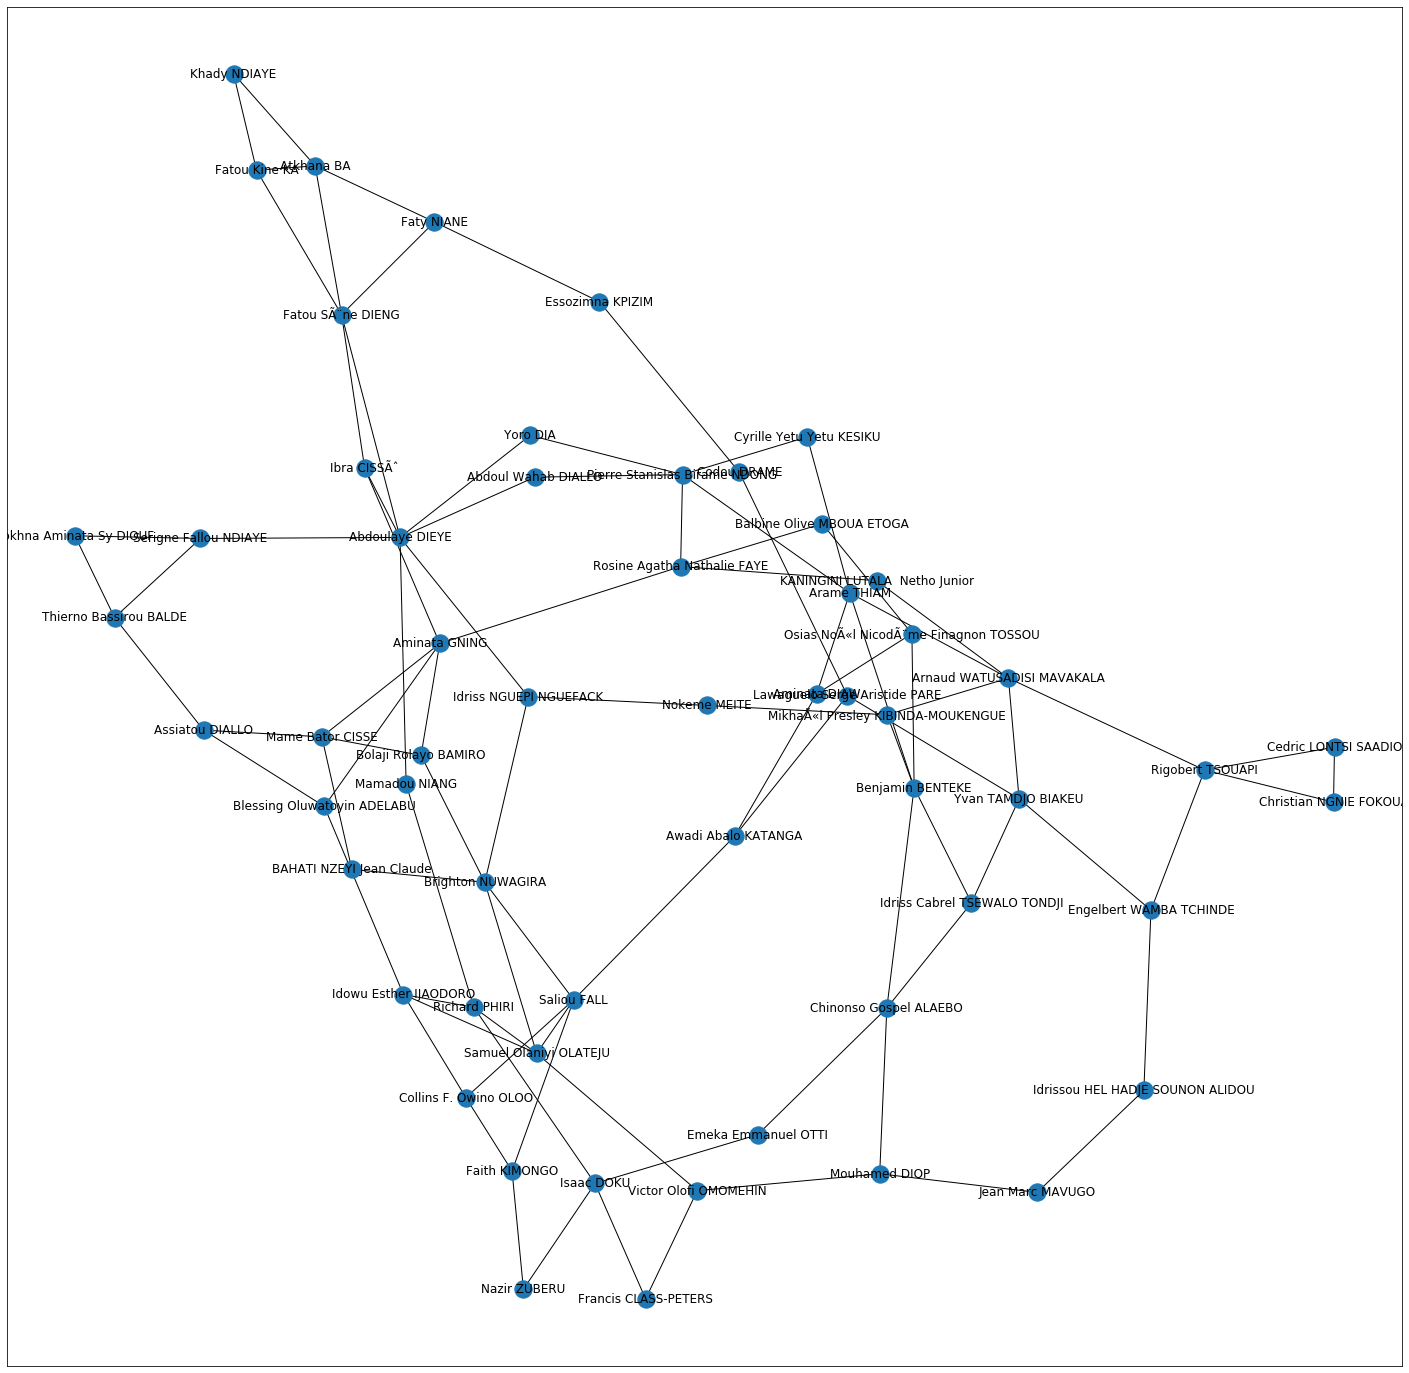

In [15]:
# Display of the graph
figure = plt.figure(figsize = (25, 25))
plt.show(nx.draw_networkx(G,with_labels = True,pos=nx.spring_layout(G)))
figure.savefig("restaurant.png",fmt="png",bbox_inches='tight', pad_inches=0.03,dpi=300)

In [16]:
# Compute the degree of every node: degrees
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

# Print the degrees
print(degrees)

[5, 3, 3, 2, 5, 4, 4, 5, 3, 3, 5, 2, 4, 2, 2, 4, 4, 3, 3, 4, 3, 3, 5, 2, 2, 5, 2, 3, 5, 5, 4, 3, 5, 3, 4, 3, 2, 3, 3, 7, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 4, 2, 3, 2, 2]


In [7]:
t=pd.DataFrame(dict(G.degree()),index=range(1)).T
TT=t.sort_values(0,ascending=False)
TT.columns =['Degré']
TT.index.name='Noeud'
TT=TT.reset_index(level = ['Noeud'],inplace = False) 
TT.head(5)

,Noeud,Degré
0,Abdoulaye DIEYE,7
1,Saliou FALL,5
2,Benjamin BENTEKE,5
3,Fatou SÃ¨ne DIENG,5
4,Brighton NUWAGIRA,5


In [8]:
cc=pd.DataFrame(dict(nx.closeness_centrality(G)),index=range(1)).T
cc.sort_values(0,ascending=True)
cc.columns =['Centralité closeness']
cc.index.name='Noeuds'
cc=cc.reset_index(level = ['Noeuds'],inplace = False) 
#cc.head(5)
cc=cc.sort_values(by='Centralité closeness',ascending=False)#.iloc[:5,:]
cc.head(5)

,Noeuds,Centralité closeness
28,Brighton NUWAGIRA,0.303191
39,Abdoulaye DIEYE,0.300000
38,Idriss NGUEPI NGUEFACK,0.300000
29,Aminata GNING,0.295337
7,Arame THIAM,0.293814


In [43]:
print([p for p in nx.all_shortest_paths(G, source="Abdoulaye DIEYE", target="Arnaud WATUSADISI MAVAKALA")])

[['Abdoulaye DIEYE', 'Idriss NGUEPI NGUEFACK', 'Nokeme MEITE', 'MikhaÃ«l Presley KIBINDA-MOUKENGUE', 'Arnaud WATUSADISI MAVAKALA'], ['Abdoulaye DIEYE', 'Abdoul Wahab DIALLO', 'Pierre Stanislas Birame NDONG', 'Arame THIAM', 'Arnaud WATUSADISI MAVAKALA'], ['Abdoulaye DIEYE', 'Yoro DIA', 'Pierre Stanislas Birame NDONG', 'Arame THIAM', 'Arnaud WATUSADISI MAVAKALA']]


In [7]:
#pip install jgraph

In [5]:
import jgraph

In [19]:
for p in nx.all_shortest_paths(G, source="Abdoulaye DIEYE", target="Arnaud WATUSADISI MAVAKALA"):
    p[1]['color'] = '#ffa07a'
obj = igraph.plot(g,vertex_label_color='black',vertex_label_size=15,vertex_size=35)
obj.show()
#for p in nx.all_shortest_paths(G, source="Abdoulaye DIEYE", target="Arnaud WATUSADISI MAVAKALA"):
#    G.vs[p[1]]['color'] = '#ffa07a'
#obj = jgraph.plot(G,vertex_label_color='black',vertex_label_size=15,vertex_size=35)
#obj.show()

TypeError: 'str' object does not support item assignment

In [9]:
bc=pd.DataFrame(dict(nx.betweenness_centrality(G)),index=range(1)).T
bc.sort_values(0,ascending=False)
bc.columns =['Centralité betweenness']
bc.index.name='Noeuds'
bc=bc.reset_index(level = ['Noeuds'],inplace = False) 
#bc.head(5)
bc=bc.sort_values(by='Centralité betweenness',ascending=False)#.iloc[:5,:]
bc.head(5)

,Noeuds,Centralité betweenness
39,Abdoulaye DIEYE,0.228718
4,Arnaud WATUSADISI MAVAKALA,0.142153
29,Aminata GNING,0.130493
32,Fatou SÃ¨ne DIENG,0.130184
7,Arame THIAM,0.115752


In [10]:
eb = nx.edge_betweenness(G)
#print(eb)
#transformer en vecteur numpy
import numpy
ebn = numpy.array(eb)
#print(ebn)
#récupérer l'indice de la valeur maximale
iebn = numpy.argmax(ebn)
print(iebn)

0


In [11]:
#construction de communautés avec edge betweenness
import networkx.algorithms.community as nxcom
#nxcom.greedy_modularity_communities(G)
res = nxcom.community_edge_betweenness(G)
#affichage du dendrogramme
igraph.plot(res)

AttributeError: module 'networkx.algorithms.community' has no attribute 'community_edge_betweenness'

In [ ]:
data1=pd.DataFrame(data['Select your name'])
data2=pd.DataFrame(degrees)
data2.columns =['Degree']



In [ ]:
data1

In [ ]:
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]
valeurs = {'node_name':data['Select your name'],'degree':degrees}
#valeurs
print(pandas.DataFrame.from_dict(valeurs).sort_values(by='degree',ascending=False).iloc[:5,:])

In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(G)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist([len(list(G.neighbors(n))) for n in G.nodes()])
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()

In [ ]:
print("Distance: \n", nx.floyd_warshall_numpy(G, nodelist=None, weight='weight'))
print("Eccentricity: \n", nx.eccentricity(G)) 
print("Radius: \n", nx.radius(G)) 
print("Center: \n", list(nx.center(G)))
print("Weiner index: \n", nx.wiener_index(G, weight=None)) 

In [12]:
print(G)

In [13]:
#degré de centralité
print(G.degree())

[('Saliou FALL', 5), ('Faith KIMONGO', 3), ('Collins F. Owino OLOO', 3), ('KANINGINI LUTALA  Netho Junior', 2), ('Arnaud WATUSADISI MAVAKALA', 5), ('Rosine Agatha Nathalie FAYE', 4), ('Idowu Esther IJAODORO', 4), ('Arame THIAM', 5), ('Osias NoÃ«l NicodÃ¨me Finagnon TOSSOU', 3), ('Aminata DIAW', 3), ('Benjamin BENTEKE', 5), ('Nazir ZUBERU', 2), ('Isaac DOKU', 4), ('Christian NGNIE FOKOUA', 2), ('Cedric LONTSI SAADIO', 2), ('Rigobert TSOUAPI', 4), ('Yvan TAMDJO BIAKEU', 4), ('Lawaguelo Serge Aristide PARE', 3), ('Assiatou DIALLO', 3), ('Mame Bator CISSE', 4), ('Blessing Oluwatoyin ADELABU', 3), ('Victor Olofi OMOMEHIN', 3), ('Samuel Olaniyi OLATEJU', 5), ('Francis CLASS-PETERS', 2), ('Cyrille Yetu Yetu KESIKU', 2), ('Pierre Stanislas Birame NDONG', 5), ('Yoro DIA', 2), ('Bolaji Rolayo BAMIRO', 3), ('Brighton NUWAGIRA', 5), ('Aminata GNING', 5), ('Richard PHIRI', 4), ('Idriss Cabrel TSEWALO TONDJI', 3), ('Fatou SÃ¨ne DIENG', 5), ('Faty NIANE', 3), ('Atkhana BA', 4), ('Thierno Bassirou BAL

In [14]:
# Print the degrees
#degrees = [len(list(G.neighbors(n))) for n in G.nodes()
print(degrees)

[5, 3, 3, 2, 5, 4, 4, 5, 3, 3, 5, 2, 4, 2, 2, 4, 4, 3, 3, 4, 3, 3, 5, 2, 2, 5, 2, 3, 5, 5, 4, 3, 5, 3, 4, 3, 2, 3, 3, 7, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 4, 2, 3, 2, 2]


In [15]:
#affichage des 5 premiers sommets, tri de manière décroissante
degrees = [len(list(G.neighbors(n))) for n in G.nodes()
valeurs = {'node_name':G.vs['name'],'degree':G.vs.degree()}
print(pandas.DataFrame.from_dict(valeurs).sort_values(by='degree',ascending=False).iloc[:5,:])


SyntaxError: invalid syntax (<ipython-input-15-89448b068814>, line 3)

In [16]:
# Compute the degree of every node: degrees
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

# Print the degrees
print(degrees)

[5, 3, 3, 2, 5, 4, 4, 5, 3, 3, 5, 2, 4, 2, 2, 4, 4, 3, 3, 4, 3, 3, 5, 2, 2, 5, 2, 3, 5, 5, 4, 3, 5, 3, 4, 3, 2, 3, 3, 7, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 4, 2, 3, 2, 2]


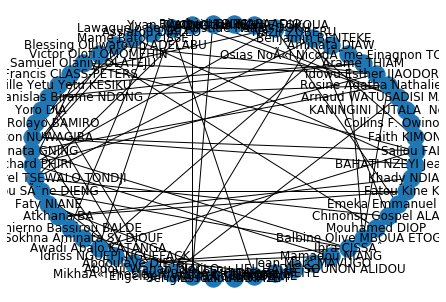

In [17]:
nx.draw_circular(G, with_labels=True)
plt.show()

In [18]:
# returns True or False whether Graph is connected 
print(nx.is_connected(G)) 

True


In [19]:
# returns number of different connected components 
print(nx.number_connected_components(G))

1


# Exploratory study of aims Senegal's student catering network

Dans cette section, nous allons utiliser les mesures du SCN pour savoir plus l'inter action des étudiant lors de la période de restauration. 
La première série de mesures que nous abordons est celle que l'on appelle la "centralité". Dans ce chapitre, nous allons explorer les quatre les métriques les plus populaires, et apprendre à les visualiser et à les combiner.

Mais d'abord, familiarisons-nous avec le réseau de données

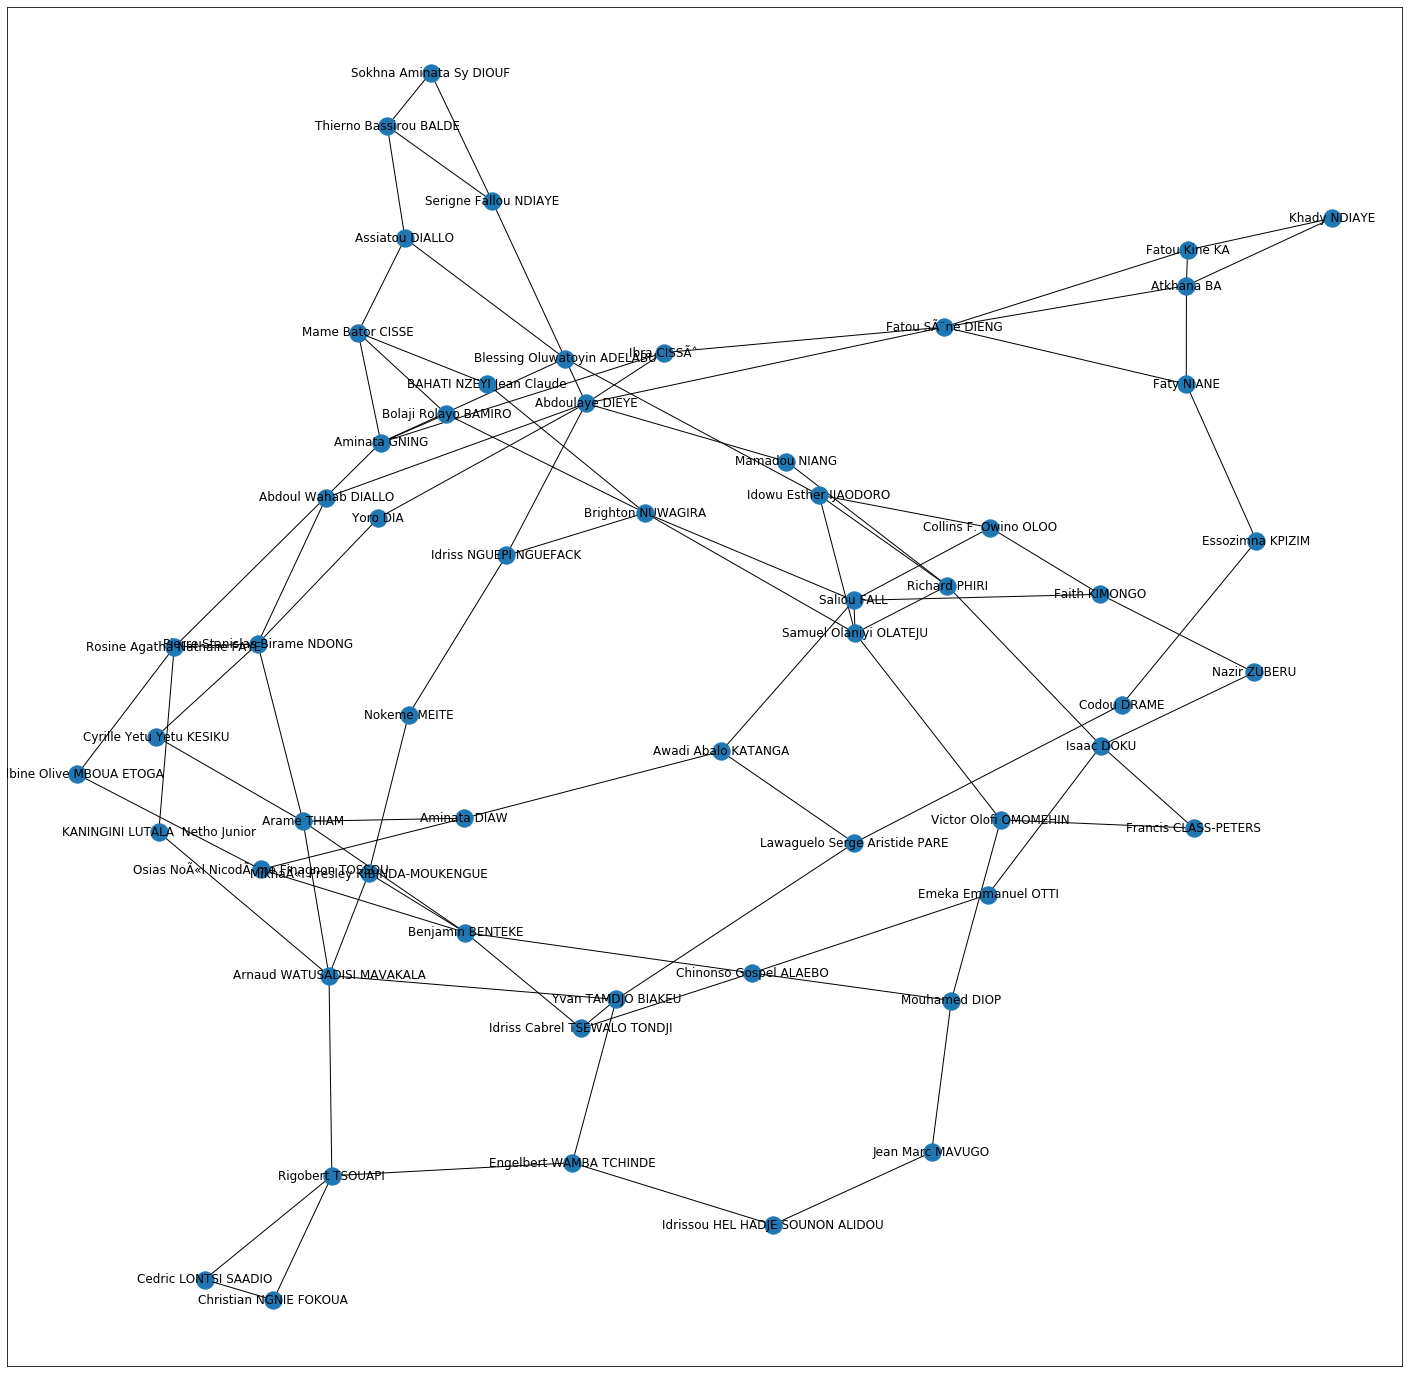

In [20]:
# Reading the csv file for edge formation
with open('restaurant.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    i = 0
    for row in readCSV:
        if i != 0 :
            G.add_edges_from([(row[2],row[3]),(row[2],row[4])])
        i+=1

        # Display of the graph
figure = plt.figure(figsize = (25, 25))
plt.show(nx.draw_networkx(G,with_labels = True,pos=nx.spring_layout(G)))
figure.savefig("restaurant.png",fmt="png",bbox_inches='tight', pad_inches=0.03,dpi=300)

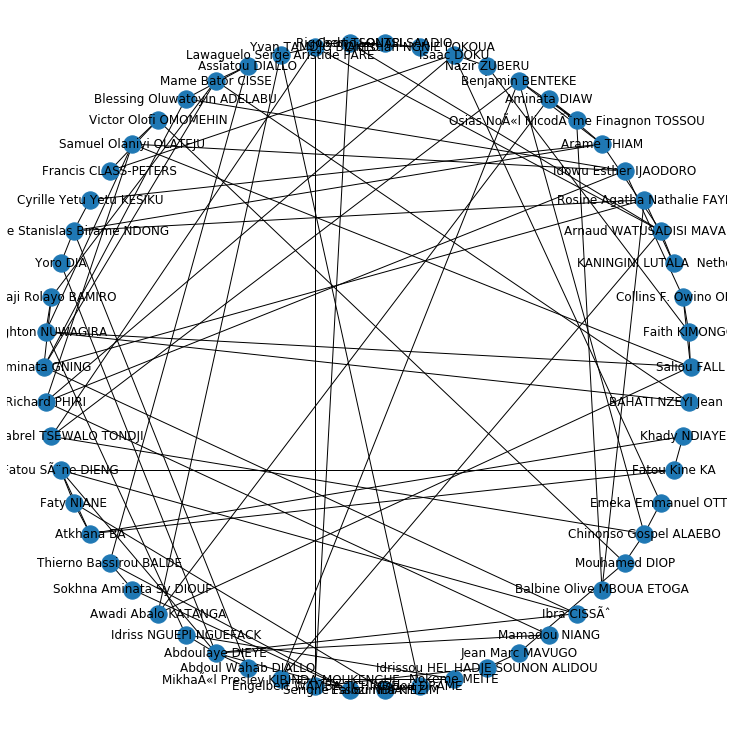

In [21]:
figure = plt.figure(figsize = (10, 10))
plt.show(nx.draw_circular(G,with_labels = True))
#nx.draw_circular(G, with_labels=True)
plt.show()

Il exite toujour dans un réseaux social des gens qui sont nettement plus populaires que les autres. Ils sont généralement très peu nombreux et sont de loin plus populaires que les autres. La première et la plus simple des mesures que nous utilisons nous aidera à trouver ces célébrités locales

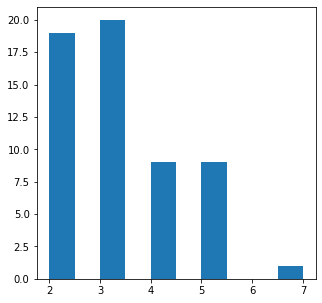

In [22]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(G)
# Plot a histogram of the degree distribution of the graph
figure = plt.figure(figsize = (5,5))
#plt.figure()
plt.hist([len(list(G.neighbors(n))) for n in G.nodes()])
plt.show()


In [23]:
#print("Clustering: \n",  nx.clustering(G))
print("global clustering: \n", nx.average_clustering(G))
print(" Average  path length: \n", nx.average_shortest_path_length(G))
degrees = [len(list(G.neighbors(n))) for n in G.nodes()] 
print("Degree distribution: \n", degrees)

global clustering: 
 0.18817733990147778
 Average  path length: 
 4.055051421657592
Degree distribution: 
 [5, 3, 3, 2, 5, 4, 4, 5, 3, 3, 5, 2, 4, 2, 2, 4, 4, 3, 3, 4, 3, 3, 5, 2, 2, 5, 2, 3, 5, 5, 4, 3, 5, 3, 4, 3, 2, 3, 3, 7, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 4, 2, 3, 2, 2]


In [24]:
nx.eccentricity(G)

{'Saliou FALL': 6,
 'Faith KIMONGO': 7,
 'Collins F. Owino OLOO': 7,
 'KANINGINI LUTALA  Netho Junior': 7,
 'Arnaud WATUSADISI MAVAKALA': 7,
 'Rosine Agatha Nathalie FAYE': 6,
 'Idowu Esther IJAODORO': 7,
 'Arame THIAM': 6,
 'Osias NoÃ«l NicodÃ¨me Finagnon TOSSOU': 7,
 'Aminata DIAW': 7,
 'Benjamin BENTEKE': 7,
 'Nazir ZUBERU': 8,
 'Isaac DOKU': 7,
 'Christian NGNIE FOKOUA': 9,
 'Cedric LONTSI SAADIO': 9,
 'Rigobert TSOUAPI': 8,
 'Yvan TAMDJO BIAKEU': 7,
 'Lawaguelo Serge Aristide PARE': 7,
 'Assiatou DIALLO': 7,
 'Mame Bator CISSE': 7,
 'Blessing Oluwatoyin ADELABU': 6,
 'Victor Olofi OMOMEHIN': 7,
 'Samuel Olaniyi OLATEJU': 7,
 'Francis CLASS-PETERS': 7,
 'Cyrille Yetu Yetu KESIKU': 6,
 'Pierre Stanislas Birame NDONG': 6,
 'Yoro DIA': 6,
 'Bolaji Rolayo BAMIRO': 6,
 'Brighton NUWAGIRA': 6,
 'Aminata GNING': 6,
 'Richard PHIRI': 8,
 'Idriss Cabrel TSEWALO TONDJI': 7,
 'Fatou SÃ¨ne DIENG': 7,
 'Faty NIANE': 7,
 'Atkhana BA': 8,
 'Thierno Bassirou BALDE': 8,
 'Sokhna Aminata Sy DIOUF': 

In [25]:
degrees = [len(list(G.neighbors(n))) for n in G.nodes()] 
print("Degree distribution: \n", degrees)

Degree distribution: 
 [5, 3, 3, 2, 5, 4, 4, 5, 3, 3, 5, 2, 4, 2, 2, 4, 4, 3, 3, 4, 3, 3, 5, 2, 2, 5, 2, 3, 5, 5, 4, 3, 5, 3, 4, 3, 2, 3, 3, 7, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 4, 2, 3, 2, 2]


In [26]:
deg=nx.degree(G) 
# calcul des degrés des nœuds du graphe g
bet=nx.betweenness_centrality(G)  
# calcul des centralités
aspl=nx.average_shortest_path_length(G)
print(aspl) # consultation des éloignements moyens

4.055051421657592


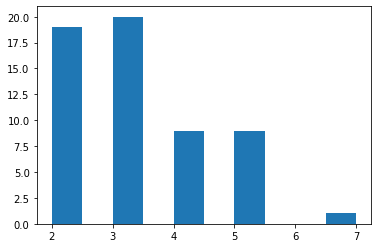

In [27]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(G)
# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist([len(list(G.neighbors(n))) for n in G.nodes()])
plt.show()


In [28]:
len(G)

58

In [29]:
# compute degree
deg=nx.degree(G)

In [30]:
### This function returns a sorted degree list -- useful for celebrity-spotting
def sorted_map(map):
    ms = sorted(map.(dict.iteritems(), key=lambda :(k,v) (-v,k))
    return ms
ds=sorted_map(deg)

SyntaxError: invalid syntax (<ipython-input-30-80194ac5cd8e>, line 3)

In [54]:
### This function returns a sorted degree list -- useful for celebrity-spotting
def sorted_map(map):
    ms = sorted(map.items(), key=lambda : (-v,k))
    return ms

In [55]:
b=nx.betweenness_centrality(G)
bs=sorted_map(b)
bs[:10]

TypeError: <lambda>() takes 0 positional arguments but 1 was given

In [19]:
d=nx.degree(G)
import matplotlib.pyplot as plot
h=plot.hist(d.values(),100) ## display a histogram of node degrees
## in 100 bins
plot.loglog(h[1][1:],h[0]) ## plot the same histogram in Log-Log space

AttributeError: 'MultiDegreeView' object has no attribute 'values'

In [14]:
ms=sorted(nx.degree_centrality(G))
ms

['Abdoul Wahab DIALLO',
 'Abdoulaye DIEYE',
 'Aminata DIAW',
 'Aminata GNING',
 'Arame THIAM',
 'Arnaud WATUSADISI MAVAKALA',
 'Assiatou DIALLO',
 'Atkhana BA',
 'Awadi Abalo KATANGA',
 'BAHATI NZEYI Jean Claude',
 'Balbine Olive MBOUA ETOGA',
 'Benjamin BENTEKE',
 'Blessing Oluwatoyin ADELABU',
 'Bolaji Rolayo BAMIRO',
 'Brighton NUWAGIRA',
 'Cedric LONTSI SAADIO',
 'Chinonso Gospel ALAEBO',
 'Christian NGNIE FOKOUA',
 'Codou DRAME',
 'Collins F. Owino OLOO',
 'Cyrille Yetu Yetu KESIKU',
 'Emeka Emmanuel OTTI',
 'Engelbert WAMBA TCHINDE',
 'Essozimna KPIZIM',
 'Faith KIMONGO',
 'Fatou Kine KA',
 'Fatou Sène DIENG',
 'Faty NIANE',
 'Francis CLASS-PETERS',
 'Ibra CISSÈ',
 'Idowu Esther IJAODORO',
 'Idriss Cabrel TSEWALO TONDJI',
 'Idriss NGUEPI NGUEFACK',
 'Idrissou HEL HADJE SOUNON ALIDOU',
 'Isaac DOKU',
 'Jean Marc MAVUGO',
 'KANINGINI LUTALA  Netho Junior',
 'Khady NDIAYE',
 'Lawaguelo Serge Aristide PARE',
 'Mamadou NIANG',
 'Mame Bator CISSE',
 'Mikhaël Presley KIBINDA-MOUKENGUE',

In [ ]:
# compute degree
deg=net.degree(g)
deg['valerois']
232
min(deg.values())
1
max(deg.values())
4691

In [19]:
len(G)

58

In [20]:
min(G)

'Abdoul Wahab DIALLO'

In [30]:
eigen_centrality = nx.eigenvector_centrality(G, max_iter=1000)

NetworkXNotImplemented: not implemented for multigraph type

In [24]:
dir (nx)

['AmbiguousSolution',
 'DiGraph',
 'ExceededMaxIterations',
 'Graph',
 'GraphMLReader',
 'GraphMLWriter',
 'HasACycle',
 'LCF_graph',
 'MultiDiGraph',
 'MultiGraph',
 'NetworkXAlgorithmError',
 'NetworkXError',
 'NetworkXException',
 'NetworkXNoCycle',
 'NetworkXNoPath',
 'NetworkXNotImplemented',
 'NetworkXPointlessConcept',
 'NetworkXTreewidthBoundExceeded',
 'NetworkXUnbounded',
 'NetworkXUnfeasible',
 'NodeNotFound',
 'NotATree',
 'OrderedDiGraph',
 'OrderedGraph',
 'OrderedMultiDiGraph',
 'OrderedMultiGraph',
 'PlanarEmbedding',
 'PowerIterationFailedConvergence',
 '__author__',
 '__bibtex__',
 '__builtins__',
 '__cached__',
 '__date__',
 '__doc__',
 '__file__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'absolute_import',
 'adamic_adar_index',
 'add_cycle',
 'add_path',
 'add_star',
 'adj_matrix',
 'adjacency',
 'adjacency_data',
 'adjacency_graph',
 'adjacency_matrix',
 'adjacency_spectrum',
 'adjlist',
 'algebraic_conn